# Home Work 4

# Q1 1,2

In [1]:
import numpy as np

#X has x1,...,xn where n = 300 containing uniform random numbers [0,1]
n = 300
X = np.around(  np.random.random_sample((n)) ,2)

#V has ν1,...,νn where n= 300 containing uniform random numbers 
#from [-1/10,1/10]
V = np.around( (0.1 - (-0.1)) * np.random.random_sample((n)) - 0.1 ,2)
D = np.sin(20*X) + 3*X + V

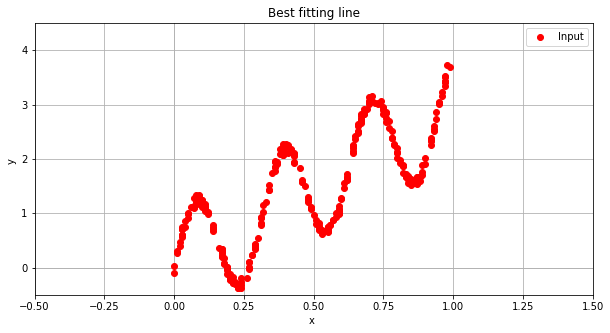

In [3]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots()
plt.xlabel("x ")
plt.ylabel("y ")
ax.xaxis.set_minor_locator(MultipleLocator(20))
ax.yaxis.set_minor_locator(MultipleLocator(20))
plt.axis([-.5, 1.5, -.5, 4.5])
plt.grid(b=True, which='both', axis='both')

plt.plot(X,D, 'ro',label='Input')
plt.title('Best fitting line')

ax.legend()
plt.show()

# 3)

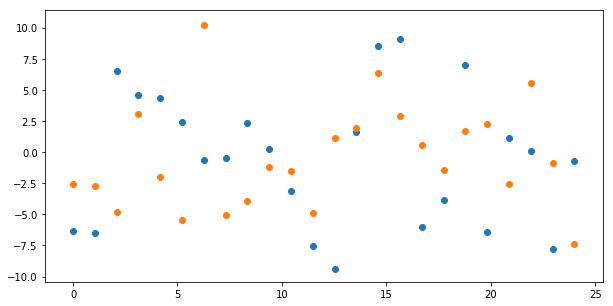

In [4]:
#weight initialisation of layer 1
mean, sigma = 0, 1 # mean and standard deviation
Weights = np.random.normal(mean)
W1 = np.random.normal(mean, 5, (2,24))
#print(W1[0,:].shape)
tmp = np.linspace(0,24, 24)
#print(tmp.shape)
plt.scatter(tmp,W1[0,:].T)
plt.scatter(tmp,W1[1,:].T)
plt.show()
#weight initialisation of layer 2
W2 = np.random.normal(mean, 5, 25)

In [9]:
def tanhDeriv(xinput):
    return 1.0 - np.tanh(xinput)**2

def Comparingoutput(xinput, d, Weights1, Weights2): 
    Out1 = np.tanh(xinput*Weights1[0,:] + Weights1[1,:])
    Out1 = np.array(Out1)
    Out2 = 0
    i = 0
    while i < 24:
        Out2 += Out1[i] * Weights2[i]
        i += 1
    Out2 += Weights2[24] #for bias
    return (d - Out2)**2

def Propogation(xinput, Weights1, Weights2, D):
#Feed Forward Propogation
    a = xinput*Weights1[0,:] + Weights1[1,:] 
    Out1 = np.tanh(a)
    Out1 = np.array(Out1)
    Out2 = 0
    i = 0
    while i < 24:
        Out2 += Out1[i] * Weights2[i]
        i += 1

    Out2 += Weights2[24] #for bias
    
#To find gradients
    Gradients2 = -(2)*(D - Out2) * Out1  
    Gradients2 = np.append(Gradients2, -2*(D-Out2) ) 
    BiasGrad1 = -2*(D-Out2)*Weights2[:24]*tanhDeriv(a) # bias gradients
    WeightGrad1 = -2*(D-Out2)*Weights2[:24]*tanhDeriv(a) * xinput # weight gradients
    
    return BiasGrad1, WeightGrad1, Gradients2

# 4)

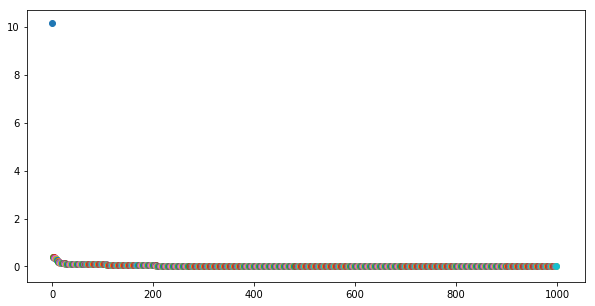

In [7]:
Weights1 = np.copy(W1)
Weights2 = np.copy(W2)

epoch = 0
learningParameter = .05/24
while epoch < 1000:
    index = 0
    Error = 0
    while index < n:
        Gradients1_bias, Gradients1_weights, Gradients2 = Propogation(X[index],Weights1,Weights2, D[index])
        Weights1[0,:] = Weights1[0,:] - learningParameter*Gradients1_weights
        Weights1[1,:] = Weights1[1,:] - learningParameter*Gradients1_bias
        Weights2 = Weights2 - learningParameter*Gradients2   
        Error += Comparingoutput(X[index], D[index], Weights1, Weights2)
        index += 1
    plt.scatter(epoch,Error/n)
    epoch += 1
plt.show()

# 5)

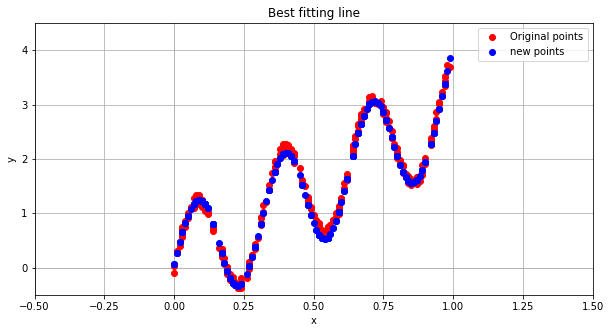

In [8]:
index = 0
w, h = 2, n;
Y = [[0 for x in range(w)] for y in range(h)]  
while index < n:
    Out1 = np.tanh(X[index]*Weights1[0,:] + Weights1[1,:])
    Out1 = np.array(Out1)
    Out2 = 0
    i = 0
    Out = 0
    while i < 24:
        Out += Out1[i] * Weights2[i]
        i += 1
    Out += Weights2[24] #for the bias
    Y[index][1] = Out
    Y[index][0] = X[index]
    index += 1
plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots()
plt.xlabel("x")
plt.ylabel("y")
ax.xaxis.set_minor_locator(MultipleLocator(20))
ax.yaxis.set_minor_locator(MultipleLocator(20))
plt.axis([-.5, 1.5, -.5, 4.5])
plt.grid(b=True, which='both', axis='both')
plt.plot(X,D, 'ro',label='Original points')
Y = np.array(Y)
plt.plot(Y[:,0],Y[:,1], 'bo',label = 'new points')
plt.title('Best fitting line')
ax.legend()
plt.show()

# Pseudocode
## 1)intialize x1,....x300 at random between [0,1]
## 2)initialize v1,...v300 at random between [-0.1.0.1]
## 3)initialize d= sin(20xi)=3xi+vi,i=1,.....300.
###   3.1) Plot (xi,di) {**There will be 3N+1 weights;N weights and N biases for first layer and N weights and 1 Bias                                            for second layer. Here N=24**}
###   3.2)initialize layer 1 and layer 2 weights
###   3.3)For comaring output run F.F to get output
###         output of layer1(out1) = tanh(xi*W1 +b)
###         output of layer2(out2)= out1 + W2(i), i=24
###         return 2(d-out2)
###   3.4)calculate gradients
###        gradient of layer2 = -2*(d-out2)*out2
###        gradient of bias of layer1= -2*(d-out2)*W2*tanhderivative(a)
###        gradient of weights of layer1= -2*(d-out2)*W2*tanhderivative(a)*xi
## 4)For MSE (n=learning parameter)
###    W1=W1-nGW1
###    Bias= b- nGb
###    W2=W2-nGW2
###    run for epochs
###    calculate error using 3.5)
###    Plot (epoch,error/n)
## 5)
###    out1=tanh(xW1+b)
###    OUTPUT=out(i)+W2(i)
###    OUTPUT=OUTPUT +bias
###    Plot OUTPUT and x
